In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.io import loadmat

In [2]:
import os
for i in os.listdir():
    if 'mat' in i:
        print(i)

ex5data1.mat


In [3]:
data = loadmat('ex5data1.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'Xtest', 'ytest', 'Xval', 'yval'])

In [4]:
X = data['X']
X_val = data['Xval']
X_test = data['Xtest']
y = data['y']
y_val = data['yval']
y_test = data['ytest']

In [5]:
X.shape,X_val.shape,X_test.shape, y.shape, y_val.shape,y_test.shape

((12, 1), (21, 1), (21, 1), (12, 1), (21, 1), (21, 1))

In [6]:
m,n=X.shape
m_val = X_val.shape[0]
m_test = X_test.shape[0]


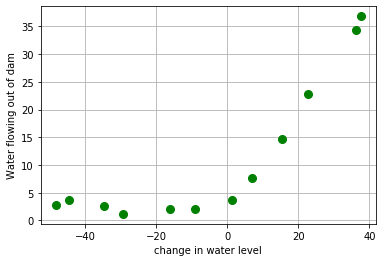

In [7]:
plt.plot(X,y, 'go',ms=8)
plt.xlabel('change in water level')
plt.ylabel('Water flowing out of dam')
plt.grid();

In [8]:
X_ = np.append(np.ones((m,1)), X,axis=1)
X_val_ = np.append(np.ones((m_val,1)), X_val,axis=1)
X_test_ = np.append(np.ones((m_test,1)), X_test,axis=1)

In [9]:
theta = np.ones([2]).reshape(-1,1)

# Regularized Cost Function

In [10]:
def regCostFunction(X,y,theta, lam):

    m= X.shape[0]
    h= X.dot(theta)
    diff = h-y
    reg_cost = 1/(2*m) * np.sum(np.square(diff)) + lam/(2*m) * np.sum(np.square(theta[1:]))
        
        # cost = 1/2m * sum((h-y)^2)
        # regularization = lambda/2m * (theta[1:]^2)   ## we donot regularize theta0
        # when we donot want to regularize the cost func, we take lambda = 0 
    
    
    # gradient
    grad = (1/m) * np.dot(X.T,diff)
    grad[1:] = grad[1:] + ((lam/m)*theta[1:])
        
        # gradient = 1/m * ((h-y)*x)
        # regularization = gradient[1:] + lam/m * theta[1:]  ## we donot regularize theta0
        # theta = theta - alpha*gradient
    
   
    return reg_cost, grad

In [11]:
regCostFunction(X_,y,theta,1)

(303.9931922202643,
 array([[-15.30301567],
        [598.25074417]]))

In [12]:
def gradient_descent(X,y,theta,lam,iter_, alpha):
    cost_history = []
    
    for i in range(iter_):
        
        cost, grad = regCostFunction(X,y,theta,lam)    
        cost_history.append(cost)
        
        theta = theta - (alpha*grad)
    
    return theta, cost_history

In [13]:
theta, cost_history = gradient_descent(X_,y,theta, 1,4000,0.001)

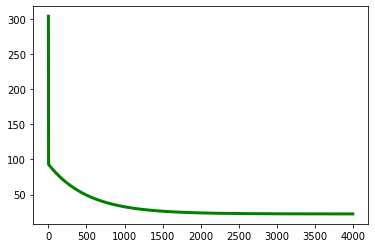

In [14]:
plt.plot(range(4000), cost_history, 'g', lw=3)

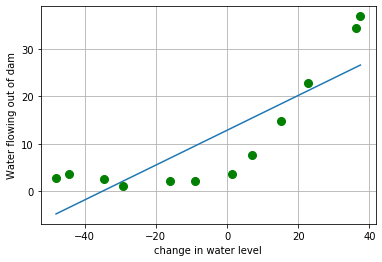

In [15]:
sns.lineplot(X[:,0], np.dot(X_,theta)[:,0])
plt.plot(X,y, 'go',ms=8)
plt.xlabel('change in water level')
plt.ylabel('Water flowing out of dam')
plt.grid();

# Learning Curve

In [16]:
def learning_curve(X,y, Xval, yval,lam, iter_,alpha):
    m,n = X.shape
    cost_val = []
    cost_train=[]
    
    for i in range(1, m+1):
            
            # set lambda for gradient descent only, use 0 to calculate cost functions

        
        theta_ = gradient_descent(X[:i],y[:i],np.zeros((n,1)), lam,iter_,alpha)[0]
        
        trainerror = regCostFunction(X[:i], y[:i], theta_,0)[0]
        cost_train.append(trainerror)
        
        valerror = regCostFunction(Xval, yval, theta_,0)[0]
        cost_val.append(valerror)

    return cost_train,cost_val
    

In [17]:
cost_train,cost_val = learning_curve(X_,y,X_val_,y_val,1,4000,0.001)

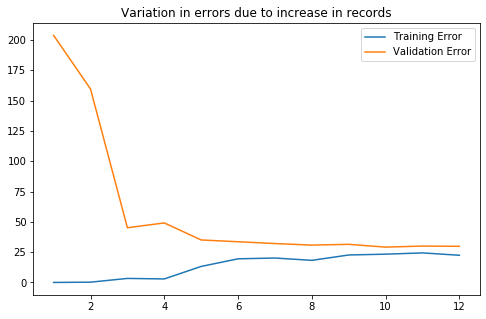

In [18]:
plt.figure(figsize=(8,5))
plt.plot(range(1,13), cost_train, label='Training Error')
plt.plot(range(1,13), cost_val, label='Validation Error')
plt.title('Variation in errors due to increase in records')
plt.legend();

In [19]:
print('\t Cost Train\t\tCost Validation\n')
for i in range(len(cost_train)):
    print('{}.\t {} \t{}'.format(i+1,cost_train[i], cost_val[i]))

	 Cost Train		Cost Validation

1.	 3.342919378613517e-05 	203.77072890224972
2.	 0.22715584072214728 	159.57529978670374
3.	 3.3229409623209265 	45.111558959508606
4.	 2.894238897733599 	49.07909265249284
5.	 13.208135908039829 	35.02975023657146
6.	 19.49022127435409 	33.55999269988034
7.	 20.133484373204222 	32.08303812611787
8.	 18.21936878401465 	30.795412865097013
9.	 22.646263457597 	31.43502250579676
10.	 23.319871963652563 	29.127591311738822
11.	 24.361679769515135 	30.00408153262963
12.	 22.409384382436272 	29.79915440280652


# Degree of Polynomial

In [20]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [21]:
def poly_features(X,X_val,X_test, p):
    
    poly = PolynomialFeatures(p,include_bias=False )
    
    X_poly = poly.fit_transform(X)
    sc = StandardScaler()
    X_poly = sc.fit_transform(X_poly)
    X_poly = np.append(np.ones((len(y),1)), X_poly,axis=1)
    
    X_polyval = poly.transform(X_val)
    X_polyval = sc.transform(X_polyval)
    X_polyval = np.append(np.ones((len(y_val),1)), X_polyval,axis=1)
    
    X_polytest = poly.transform(X_test)
    X_polytest = sc.transform(X_polytest)
    X_polytest = np.append(np.ones((len(y_test),1)), X_polytest,axis=1)
    
    
    return X_poly, X_polyval, X_polytest

# Comparing 2 Degree Polynomial Error to 8 Degree

In [22]:
polyx, polyval, polytest = poly_features(X,X_val,X_test,8)     # 8 degree
polyx1, polyval1, polytest1 = poly_features(X,X_val,X_test,2)  # 2 degree

In [23]:
pcostT, pcostV = learning_curve(polyx,y,polyval,y_val,1,4000,0.001)
pcostT1, pcostV1 = learning_curve(polyx1,y,polyval1,y_val,1,4000,0.001)

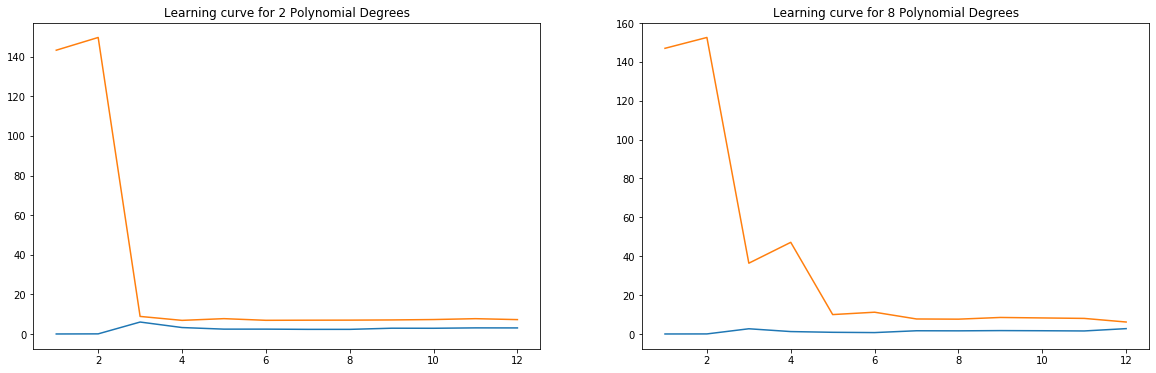

In [24]:
fig,axes = plt.subplots(1,2,figsize=(20,6))

axes[0].plot(range(1,13), pcostT1)
axes[0].plot(range(1,13), pcostV1)
axes[0].set_title('Learning curve for 2 Polynomial Degrees')

axes[1].plot(range(1,13), pcostT)
axes[1].plot(range(1,13), pcostV)
plt.title('Learning curve for 8 Polynomial Degrees');

# Choosing best Degree Polynomial

In [25]:
poly_costV= []
poly_costT= []
theta_=[]
for p in range(1,15):
    
    X_poly, X_polyval, X_polytest = poly_features(X,X_val,X_test,p)
            
        # set lamda = 1 for gradient descent only, use 0 to calculate cost functions

    
    theta = gradient_descent(X_poly, y, np.zeros((X_poly.shape[1],1)), 1,4000,0.001)[0] 
    
    poly_costT.append(regCostFunction(X_poly,y,theta,0)[0])
    poly_costV.append(regCostFunction(X_polyval,y_val,theta,0)[0])
    
    theta_.append(theta)
    
    

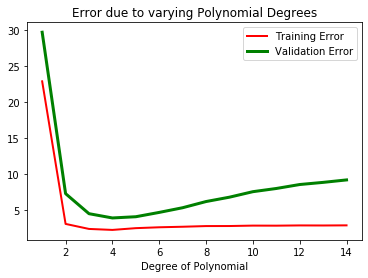

In [26]:
plt.plot(range(1,15), poly_costT, 'r', lw=2, label='Training Error')
plt.plot(range(1,15), poly_costV, 'g', lw=3,label='Validation Error')

plt.xlabel('Degree of Polynomial')
plt.title('Error due to varying Polynomial Degrees')

plt.legend();

# Working with best degree Polynomial (4)

In [27]:
the = theta_[4-1]

In [28]:
p=4
X_poly, X_polyval, X_polytest = poly_features(X,X_val,X_test,p)

In [29]:
regCostFunction(X_polytest,y_test,the,0 )[0]

4.147430548514343

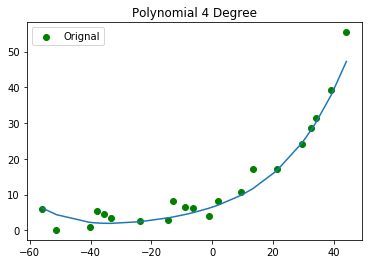

In [30]:
plt.scatter(X_test, y_test, label='Orignal', c='g')
sns.lineplot(X_test[:,0],np.dot(X_polytest, the)[:,0],legend='brief')
plt.title('Polynomial 4 Degree')
plt.legend();

# Regularization

# Choosing best Lambda Values

In [31]:
errorval = []
errortrain = []
thetaR=[]
for i in np.arange(0,10, 1):

        # set lamda = i for gradient descent only, use 0 to calculate cost functions
        
    theta = gradient_descent(X_poly,y,np.zeros((X_poly.shape[1],1)), i, 4000, 0.001)[0]
    
    errortrain.append(regCostFunction(X_poly,y,theta,0)[0])
    errorval.append(regCostFunction(X_polyval,y_val,theta,0)[0])
    
    
    thetaR.append(theta)
    
    

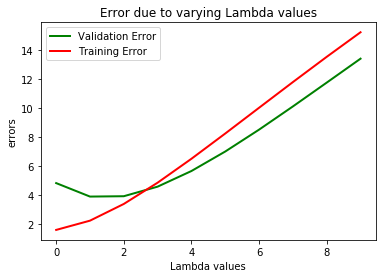

In [32]:
plt.plot(np.arange(0,10, 1), errorval, 'g', lw=2,label='Validation Error')
plt.plot(np.arange(0,10, 1), errortrain, 'r', lw=2,label='Training Error')

plt.xlabel('Lambda values')
plt.ylabel('errors')
plt.title('Error due to varying Lambda values')
plt.legend();

# Working with Best lambda value

In [33]:
min_ = np.array(errorval).argmin()

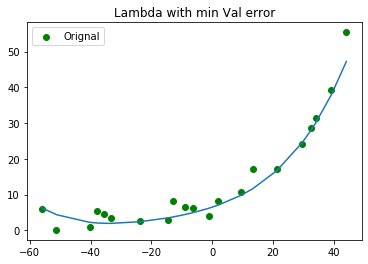

In [34]:
plt.scatter(X_test, y_test, label='Orignal', c='g')
sns.lineplot(X_test[:,0],np.dot(X_polytest, thetaR[min_])[:,0],legend='brief')
plt.title('Lambda with min Val error')
plt.legend();

In [35]:
regCostFunction(X_polytest,y_test,thetaR[min_],0)[0]

4.147430548514343

In [36]:
print('\tPredicted\tOrignal\n')
for i in range(len(y_test)):
    print('{}\t{}\t{}'.format(i+1,np.dot(X_polytest, thetaR[min_])[i], y_test[i]))

	Predicted	Orignal

1	[1.95102495]	[3.31688953]
2	[2.06376296]	[5.39768952]
3	[4.38195787]	[0.13042984]
4	[4.97429262]	[6.1925982]
5	[16.65726453]	[17.08848712]
6	[2.23721775]	[0.79950805]
7	[3.48320825]	[2.82479183]
8	[27.99580849]	[28.62123334]
9	[11.64011702]	[17.04639081]
10	[47.21852648]	[55.38437334]
11	[6.15257568]	[4.07936733]
12	[3.75443163]	[8.27039793]
13	[29.97084803]	[31.32355102]
14	[37.85428257]	[39.15906103]
15	[7.03450498]	[8.08727989]
16	[24.47040959]	[24.11134389]
17	[2.41399921]	[2.4773548]
18	[4.4021407]	[6.56606472]
19	[6.25246384]	[6.0380888]
20	[1.97688244]	[4.69273956]
21	[9.78356996]	[10.83004606]


# Comparing 1 vs 100 Lambda

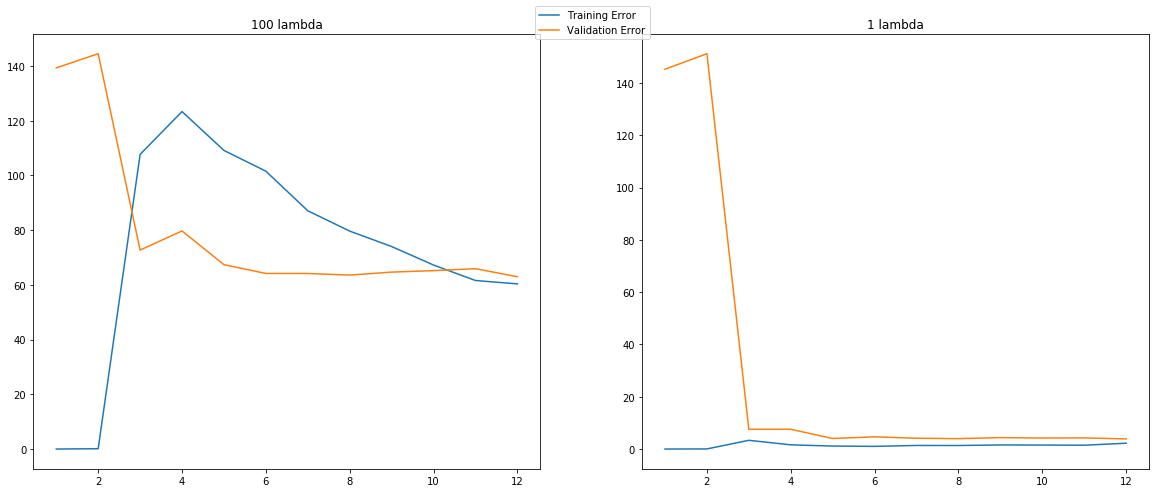

In [37]:
pcostT, pcostV = learning_curve(X_poly,y,X_polyval,y_val,1,4000,0.001)
pcostT1, pcostV1 = learning_curve(X_poly,y,X_polyval,y_val,100,4000,0.001)

fig,axes = plt.subplots(1,2,figsize=(20,8))
axes[0].plot(range(1,13), pcostT1)
axes[0].plot(range(1,13), pcostV1)
axes[0].set_title('100 lambda')
# plt.legend()

axes[1].plot(range(1,13), pcostT, label='Training Error')
axes[1].plot(range(1,13), pcostV, label='Validation Error')
axes[1].set_title('1 lambda')

plt.legend(bbox_to_anchor=(0.5, 0., -0.475, 1.075));